In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [25]:
df=pd.read_csv("./data/seoul_bicycle.csv")
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,Jan-20-2020,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,Jan-20-2020,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,Jan-20-2020,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64


In [26]:
import copy
df_copy= copy.deepcopy(df)
df_copy.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,Jan-20-2020,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,Jan-20-2020,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,Jan-20-2020,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64


In [27]:
print(df.isnull().sum())
print(df_copy.isnull().sum())

대여일자          0
대여소번호         0
대여소명          0
대여구분코드        0
성별        54390
연령대코드         0
이용건수          0
운동량           0
탄소량           0
이동거리          0
이용시간          0
dtype: int64
대여일자          0
대여소번호         0
대여소명          0
대여구분코드        0
성별        54390
연령대코드         0
이용건수          0
운동량           0
탄소량           0
이동거리          0
이용시간          0
dtype: int64


In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    327231 non-null  object 
 1   대여소번호   327231 non-null  int64  
 2   대여소명    327231 non-null  object 
 3   대여구분코드  327231 non-null  object 
 4   성별      272841 non-null  object 
 5   연령대코드   327231 non-null  object 
 6   이용건수    327231 non-null  int64  
 7   운동량     327231 non-null  object 
 8   탄소량     327231 non-null  object 
 9   이동거리    327231 non-null  float64
 10  이용시간    327231 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


In [29]:
df_copy["대여일자"]=pd.to_datetime(df_copy["대여일자"]) # to_datetime 이용해서 날짜로 변경시키기.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     327231 non-null  object        
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 27.5+ MB


In [30]:
pd.to_numeric(df_copy["운동량"])

ValueError: Unable to parse string "\N" at position 2344

In [31]:
df_copy.iloc[2344] # \N 때문에 to_numeric을 사용하지 못 하게 되었다.

대여일자      2020-01-20 00:00:00
대여소번호                     165
대여소명              165. 중앙근린공원
대여구분코드                 일일(회원)
성별                         \N
연령대코드                 AGE_003
이용건수                        1
운동량                        \N
탄소량                        \N
이동거리                      0.0
이용시간                       40
Name: 2344, dtype: object

In [32]:
pd.to_numeric(df_copy["운동량"], errors="coerce")

0           61.82
1           39.62
2          430.85
3            1.79
4         4501.96
           ...   
327226     689.57
327227       0.00
327228      19.96
327229      43.77
327230    4735.63
Name: 운동량, Length: 327231, dtype: float64

In [34]:
df_copy["운동량"]=pd.to_numeric(df_copy["운동량"], errors="coerce")
df_copy.iloc[2344]

대여일자      2020-01-20 00:00:00
대여소번호                     165
대여소명              165. 중앙근린공원
대여구분코드                 일일(회원)
성별                         \N
연령대코드                 AGE_003
이용건수                        1
운동량                       NaN
탄소량                        \N
이동거리                      0.0
이용시간                       40
Name: 2344, dtype: object

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     326830 non-null  float64       
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 27.5+ MB


In [56]:
bins = [0, 200, 400, df_copy['운동량'].max()]
print(bins) # bins 4개, category는 3개이다.
# bins = categories + 1

[0, 200, 400, 163936052.3]


In [41]:
df_copy["운동량"]

0           61.82
1           39.62
2          430.85
3            1.79
4         4501.96
           ...   
327226     689.57
327227       0.00
327228      19.96
327229      43.77
327230    4735.63
Name: 운동량, Length: 327231, dtype: float64

In [46]:
pd.cut(df_copy["운동량"], bins=bins, right=False) # 오른쪽은 포함하지 않는다.

0                 [0.0, 200.0)
1                 [0.0, 200.0)
2         [400.0, 163936052.3)
3                 [0.0, 200.0)
4         [400.0, 163936052.3)
                  ...         
327226    [400.0, 163936052.3)
327227            [0.0, 200.0)
327228            [0.0, 200.0)
327229            [0.0, 200.0)
327230    [400.0, 163936052.3)
Name: 운동량, Length: 327231, dtype: category
Categories (3, interval[float64, left]): [[0.0, 200.0) < [200.0, 400.0) < [400.0, 163936052.3)]

In [49]:
labels=["운동부족", "보통", "많음"]
pd.cut(df_copy["운동량"], labels=labels, bins=bins, right=False)

0         운동부족
1         운동부족
2           많음
3         운동부족
4           많음
          ... 
327226      많음
327227    운동부족
327228    운동부족
327229    운동부족
327230      많음
Name: 운동량, Length: 327231, dtype: category
Categories (3, object): ['운동부족' < '보통' < '많음']

In [91]:
pd.cut(df_copy["운동량"], labels=labels, bins=bins, right=False).value_counts()

많음      187257
운동부족    100217
보통       39355
Name: 운동량, dtype: int64

In [50]:
df_copy.describe()

,대여소번호,이용건수,운동량,이동거리,이용시간
count,327231.000000,327231.000000,3.268300e+05,3.272310e+05,327231.000000
mean,1288.411064,23.615400,6.921371e+03,1.068811e+05,752.814486
std,1012.645329,59.922618,6.564823e+05,4.634955e+05,2647.383179
min,3.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,562.000000,2.000000,1.380500e+02,5.290000e+03,66.000000
50%,1204.000000,6.000000,6.017050e+02,2.290000e+04,207.000000
75%,1933.000000,22.000000,2.481175e+03,9.346000e+04,670.000000
max,99999.000000,7451.000000,1.639361e+08,5.670905e+07,458960.000000


In [51]:
df_copy.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64


In [77]:
df_copy['운동량_cut'] = pd.cut(df_copy['운동량'], bins=10) # 동일한 구간으로 10개 나눠보기. 데이터의 분포를 알 수 있다.

In [78]:
print(df_copy["운동량"].min())
print(df_copy["운동량"].max())

0.0
163936052.3


In [79]:
df_copy["운동량_cut"].value_counts()

(-163936.052, 16393605.23]      326816
(98361631.38, 114755236.61]          9
(32787210.46, 49180815.69]           2
(16393605.23, 32787210.46]           1
(114755236.61, 131148841.84]         1
(147542447.07, 163936052.3]          1
(49180815.69, 65574420.92]           0
(65574420.92, 81968026.15]           0
(81968026.15, 98361631.38]           0
(131148841.84, 147542447.07]         0
Name: 운동량_cut, dtype: int64

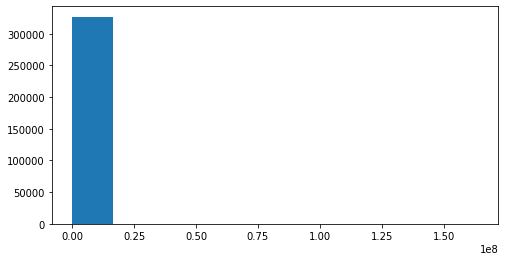

In [80]:
_=plt.figure(figsize=(8,4))
_=plt.hist(df_copy["운동량"]) # 데이터의 분포가 한 쪽으로 쏠려있음을 알 수 있다.

In [81]:
df_copy['운동량_qcut'] = pd.qcut(df_copy['운동량'], q=10)

In [84]:
df_copy["운동량_qcut"].value_counts() # 데이터의 분포를 고려하여, 데이터의 개수가 비슷하도록 나누어 준다.

(93.414, 192.02]           32690
(-0.001, 24.737]           32683
(24.737, 93.414]           32683
(601.705, 1079.744]        32683
(1079.744, 1889.606]       32683
(1889.606, 3328.186]       32683
(3328.186, 6805.188]       32683
(6805.188, 163936052.3]    32683
(344.45, 601.705]          32680
(192.02, 344.45]           32679
Name: 운동량_qcut, dtype: int64

In [98]:
qcut_bins=[0, 0.2, 0.8, 1] # 데이터의 개수를 기준으로 나눠서 범위가 일정치 않음. 그래서 q를 이용해서 임의로 범위를 나눌 수 있다.

In [101]:
pd.qcut(df_copy["운동량"], q=qcut_bins) # q=quantile 비율을 의미한다.
# bins가 4개, categories는 3개 이다.

0                (-0.001, 93.414]
1                (-0.001, 93.414]
2              (93.414, 3328.186]
3                (-0.001, 93.414]
4         (3328.186, 163936052.3]
                   ...           
327226         (93.414, 3328.186]
327227           (-0.001, 93.414]
327228           (-0.001, 93.414]
327229           (-0.001, 93.414]
327230    (3328.186, 163936052.3]
Name: 운동량, Length: 327231, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 93.414] < (93.414, 3328.186] < (3328.186, 163936052.3]]

In [102]:
pd.qcut(df_copy["운동량"], q=qcut_bins).value_counts()

(93.414, 3328.186]         196098
(-0.001, 93.414]            65366
(3328.186, 163936052.3]     65366
Name: 운동량, dtype: int64

In [103]:
qcut_labels=["적음", "보통", "많음"]

In [105]:
pd.qcut(df_copy["운동량"], qcut_bins, qcut_labels)
# 데이터의 개수 고려해서 나눔 > 임의로 범위 지정 > 카테고리 넣어주기.

0         적음
1         적음
2         보통
3         적음
4         많음
          ..
327226    보통
327227    적음
327228    적음
327229    적음
327230    많음
Name: 운동량, Length: 327231, dtype: category
Categories (3, object): ['적음' < '보통' < '많음']

In [106]:
pd.qcut(df_copy["운동량"], qcut_bins, qcut_labels).value_counts()

보통    196098
적음     65366
많음     65366
Name: 운동량, dtype: int64

In [128]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [129]:
df_copy=df.copy()
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [130]:
df_copy.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [131]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [132]:
df_copy["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [133]:
def eng2kor(x):
    if x=="man":
        return "남자"
    elif x=="woman":
        return "여자"
    else:
        return "아이"

In [134]:
df_copy["who"]=df_copy["who"].apply(eng2kor)

In [135]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,남자,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,여자,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,여자,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,여자,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,남자,True,NaN,Southampton,no,True


In [136]:
df_copy["who"].value_counts()

남자    537
여자    271
아이     83
Name: who, dtype: int64

In [137]:
df_copy["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [138]:
df_copy["survived"]=df_copy["survived"].apply(lambda x: "생존" if x==1 else "사망")
# x==1인 경우 생존이고, x==1이 아닌 경우는 사망이다.

In [139]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,사망,3,male,22.0,1,0,7.2500,S,Third,남자,True,NaN,Southampton,no,False
1,생존,1,female,38.0,1,0,71.2833,C,First,여자,False,C,Cherbourg,yes,False
2,생존,3,female,26.0,0,0,7.9250,S,Third,여자,False,NaN,Southampton,yes,True
3,생존,1,female,35.0,1,0,53.1000,S,First,여자,False,C,Southampton,yes,False
4,사망,3,male,35.0,0,0,8.0500,S,Third,남자,True,NaN,Southampton,no,True


In [141]:
df_copy["survived"].value_counts()

사망    549
생존    342
Name: survived, dtype: int64

In [142]:
df_copy=df.copy()
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [144]:
df_copy.groupby("sex").mean() # sex를 기준으로 평균을 구한다.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [146]:
df_copy.groupby(["sex", "pclass"]).mean() # sex와 pclass를 기준으로 평균을 구한다.

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.611765  0.553191  0.457447  106.125798   
       2       0.921053  28.722973  0.486842  0.605263   21.970121   
       3       0.500000  21.750000  0.895833  0.798611   16.118810   
male   1       0.368852  41.281386  0.311475  0.278689   67.226127   
       2       0.157407  30.740707  0.342593  0.222222   19.741782   
       3       0.135447  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

In [148]:
df_copy.groupby(['sex', 'pclass'])['survived'].mean()
# sex, pclass 기준으로 survived의 평균을 구하기.

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [149]:
pd.DataFrame(df_copy.groupby(['sex', 'pclass'])['survived'].mean())

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [150]:
df_copy.groupby(['sex', 'pclass'])[['survived']].mean()
# 대괄호로 2번 감싸면 데이터 프레임이 된다.

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [153]:
df_copy.groupby(["sex", "pclass"])["survived"].mean().reset_index()

,sex,pclass,survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [155]:
df_copy.groupby(['sex', 'pclass'])[['survived', "age"]].mean()

survived        age
sex    pclass                     
female 1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
male   1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589

In [157]:
df_copy.groupby(['sex', 'pclass'])[['survived', "age"]].agg(["mean", "sum"])
# 평균과 합계를 모두 구하고 싶은 경우에는 agg를 이용한다.

survived            age         
                   mean sum       mean      sum
sex    pclass                                  
female 1       0.968085  91  34.611765  2942.00
       2       0.921053  70  28.722973  2125.50
       3       0.500000  72  21.750000  2218.50
male   1       0.368852  45  41.281386  4169.42
       2       0.157407  17  30.740707  3043.33
       3       0.135447  47  26.507589  6706.42

# 연습문제

In [240]:
df=sns.load_dataset("titanic")

In [241]:
df_copy=df.copy()

In [242]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [243]:
df_copy["sex"].unique()

array(['male', 'female'], dtype=object)

In [250]:
df_copy["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [251]:
df_copy.loc[df_copy["who"]=="child", "age"].count()

0

In [252]:
df_copy.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [253]:
df_M=df_copy.loc[df_copy["who"]=="man", "age"].mean()
df_FM=df_copy.loc[df_copy["who"]=="woman", "age"].mean()
print(df_M) # 남자의 평균 나이
print(df_FM) # 여자의 평균 나이

33.17312348668282
32.0


In [254]:
df_copy["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [255]:
def who2age(x):
    if x=="man":
        return df_M
    elif x=="woman":
        return df_FM
    else:
        return np.nan

In [256]:
df_copy["age"]=df_copy["who"].apply(who2age)

In [257]:
"""
df_copy.loc[df_copy["who"]=="man", "age"]=df_M
df_copy.loc[df_copy["who"]=="woman", "age"]=df_FM
"""

'\ndf_copy.loc[df_copy["who"]=="man", "age"]=df_M\ndf_copy.loc[df_copy["who"]=="woman", "age"]=df_FM\n'

In [258]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,33.173123,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,32.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,32.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,32.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,33.173123,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [260]:
df_copy['age'].isnull().sum()
# 예제는 177개인데, 아무리 돌려봐도 child는 83명이다.

83

In [261]:
df_copy.groupby('who').get_group('child')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,NaN,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,NaN,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,NaN,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,NaN,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,NaN,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,NaN,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,NaN,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,NaN,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
869,1,3,male,NaN,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [265]:
df_copy.groupby('embark_town').get_group('Cherbourg')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,32.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,NaN,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,32.000000,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,33.173123,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,33.173123,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,32.000000,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,32.000000,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
875,1,3,female,NaN,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,32.000000,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [267]:
# pivot table : index, columns, values
pd.pivot_table(data=df_copy, index="who", values="survived") # only index

,survived
who,
child,0.590361
man,0.163873
woman,0.756458


In [268]:
pd.pivot_table(data=df_copy, columns='who', values='survived') # only columns

who,child,man,woman
survived,0.590361,0.163873,0.756458


In [270]:
pd.pivot_table(data=df_copy, index=['who', 'pclass'], values='survived') # only index

survived
who   pclass          
child 1       0.833333
      2       1.000000
      3       0.431034
man   1       0.352941
      2       0.080808
      3       0.119122
woman 1       0.978022
      2       0.909091
      3       0.491228

In [272]:
pd.pivot_table(data=df_copy, index='who', columns='pclass', values='survived') # index, columns

pclass,1,2,3
who,,,
child,0.833333,1.000000,0.431034
man,0.352941,0.080808,0.119122
woman,0.978022,0.909091,0.491228


In [274]:
pd.pivot_table(data=df_copy, index='who', columns='pclass', values='survived', aggfunc=['sum', 'mean']) # index, columns, agg

sum              mean                    
pclass   1   2   3         1         2         3
who                                             
child    5  19  25  0.833333  1.000000  0.431034
man     42   8  38  0.352941  0.080808  0.119122
woman   89  60  56  0.978022  0.909091  0.491228